# Stroke Prediction

Table of Contents:
1. [Importing Libraries](#1) <a href= "1"></a>
2. [Importing Dataset](#2) <a href= "2"></a>
3. [Data Visualization](#3) <a href= "3"></a> <br> 
    3.1. [Heat Map Correlation](#3.1) <a href= "3.1"></a> <br>
    3.2. [Count Plot](#3.2) <a href= "3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Gender](#3.2.1) <a href= "3.2.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Hypertension](#3.2.2) <a href= "3.2.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [Marriage Status](#3.2.3) <a href= "3.2.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [Work Type](#3.2.4) <a href= "3.2.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [Residence Type](#3.2.5) <a href= "3.2.5"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; f. [Smoking Status](#3.2.6) <a href= "3.2,6"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; g. [Stroke](#3.2.7) <a href= "3.2.7"></a> <br>
    3.3 [Distribution Plot](#3.3) <a href= "3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Avg. Glucose Level](#3.3.1) <a href= "3.3.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [BMI](#3.3.2) <a href= "3.3.2"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; c. [No Stroke vs Stroke by BMI](#3.3.3) <a href= "3.3.3"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; d. [No Stroke vs Stroke by Avg. Glucose Level](#3.3.4) <a href= "3.3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; e. [No Stroke vs Stroke by Age](#3.3.5) <a href= "3.3.5"></a> <br>
    3.4 [Scatter Plot](#3.4) <a href= "3.4"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; a. [Age vs BMI](#3.4.1) <a href= "3.4.1"></a> <br>
    &nbsp;&nbsp;&nbsp;&nbsp; b. [Age vs Avg. Glucose Level](#3.4.2) <a href= "3.4.2"></a> <br>
    3.5 [Cat Plot](#3.5) <a href= "3.5"></a> <br>
    3.6 [Pair Plot](#3.6) <a href= "3.6"></a> <br>
4. [Data Preprocessing](#4) <a href= "4"></a> <br>

9. [Model Selection](#9) <a href= "9"></a> <br>
10. [Tuning the Models](#10) <a href= "10"></a> <br>
11. [Models after Tuning Hyperparameters](#11) <a href= "11"></a> <br>
    11.1 [RandomForest](#11.1) <a href= "11.1"></a> <br>
    11.2 [XGBoost](#11.2) <a href= "11.2"></a> <br>

# **Importing Libraries** <a id="1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Importing Dataset** <a id="2"></a>

In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,27323,Female,67.00,0,0,Yes,Self-employed,Urban,68.61,31.9,never smoked,0
1,3442,Female,79.00,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
2,41673,Female,45.00,0,0,Yes,Private,Rural,80.93,23.1,never smoked,0
3,23561,Female,48.00,0,0,Yes,Private,Rural,84.56,41.8,never smoked,0
4,38549,Female,62.00,0,0,Yes,Private,Urban,212.62,35.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7406,18671,Female,47.00,0,0,Yes,Govt_job,Rural,111.68,39.5,never smoked,0
7407,45658,Male,14.00,0,0,No,Private,Rural,84.41,33.9,never smoked,0
7408,35123,Female,1.24,0,0,No,children,Urban,84.20,19.2,Unknown,0
7409,55244,Male,40.00,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7411 non-null   int64  
 1   gender             7411 non-null   object 
 2   age                7411 non-null   float64
 3   hypertension       7411 non-null   int64  
 4   heart_disease      7411 non-null   int64  
 5   ever_married       7411 non-null   object 
 6   work_type          7411 non-null   object 
 7   Residence_type     7411 non-null   object 
 8   avg_glucose_level  7411 non-null   float64
 9   bmi                7151 non-null   float64
 10  smoking_status     7411 non-null   object 
 11  stroke             7411 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 694.9+ KB


**There are null values present in 'bmi'.**

In [5]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  260
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

**We replaced null values of 'bmi' with mean in that column.**

In [7]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**After checking, as you can see there are no null values present in our column.**

In [8]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,37194.251788,51.102445,0.079611,0.056942,111.979154,29.184300,0.344083
std,21226.452878,22.629794,0.270709,0.231748,46.270651,6.874567,0.475100
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18582.500000,35.000000,0.000000,0.000000,79.958071,25.000000,0.000000
50%,37739.000000,57.000000,0.000000,0.000000,96.570000,28.700000,0.000000
75%,55260.000000,70.000000,0.000000,0.000000,127.220000,32.535393,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
selected_columns = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
subset_dataset = dataset[selected_columns]

# Tính toán ma trận tương quan
correlation_matrix = subset_dataset.corr()
correlation_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.028682,0.013514,0.031852,0.016318,-0.011537,0.045991
age,0.028682,1.000000,0.166831,0.197907,0.254642,0.262219,0.557128
hypertension,0.013514,0.166831,1.000000,0.121331,0.110950,0.125200,-0.047227
heart_disease,0.031852,0.197907,0.121331,1.000000,0.199917,0.051384,0.058584
avg_glucose_level,0.016318,0.254642,0.110950,0.199917,1.000000,0.205654,0.214369
bmi,-0.011537,0.262219,0.125200,0.051384,0.205654,1.000000,0.070152
stroke,0.045991,0.557128,-0.047227,0.058584,0.214369,0.070152,1.000000


# **Data Visualization** <a id="3"></a>

## **Heat Map Correlation** <a id="3.1"></a>

<Axes: >

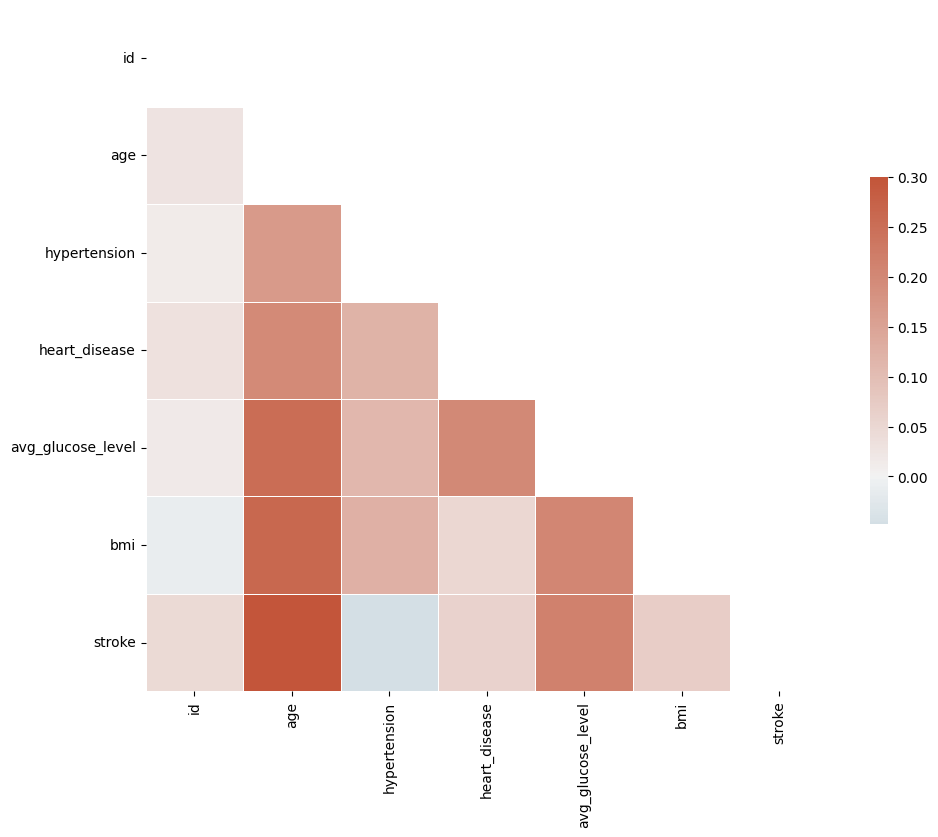

In [10]:
# Compute the correlation matrix
corr = subset_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

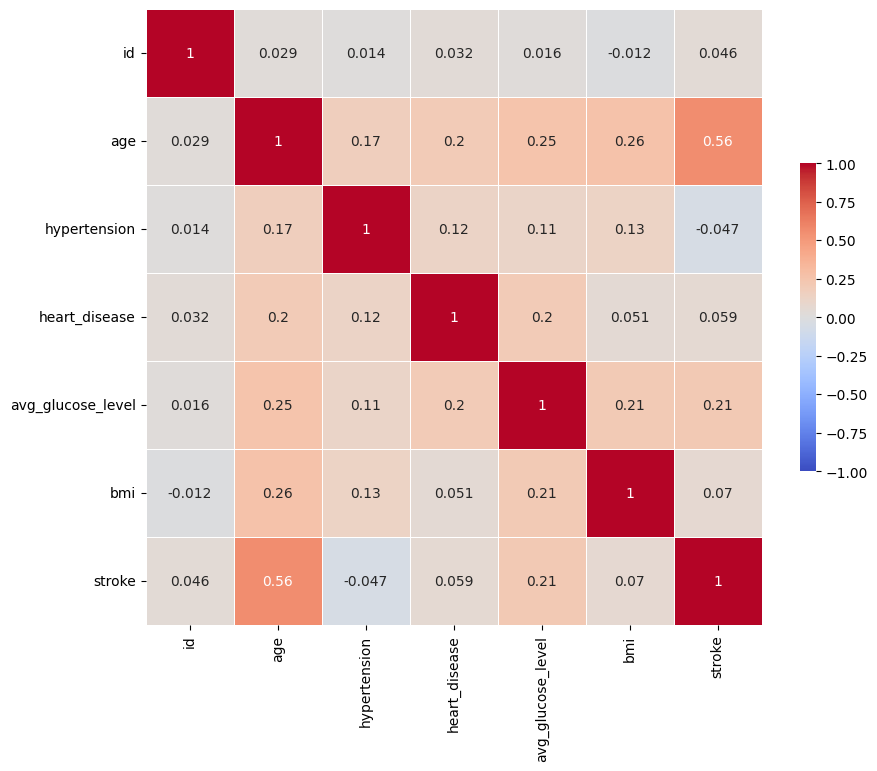

In [11]:
# Bỏ cột 'id'
#subset_dataset = subset_dataset.drop(columns=['id'])

# Tính ma trận tương quan
corr = subset_dataset.corr()

# Thiết lập figure cho matplotlib
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ heatmap với cmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Hiển thị biểu đồ
plt.show()

## **Count Plot** <a id="3.2"></a>

### **Gender** <a id="3.2.1"></a>

gender
Female    4900
Male      2511
Name: count, dtype: int64


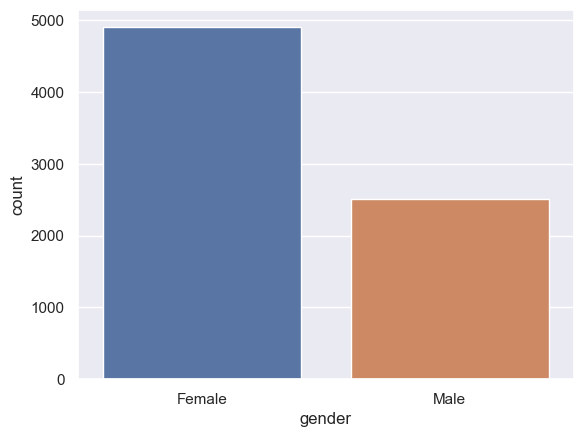

In [12]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

*Above, you can see the Females present in our dataset is higher than males.*

### **Hypertension** <a id="3.2.2"></a>

hypertension
0    6821
1     590
Name: count, dtype: int64


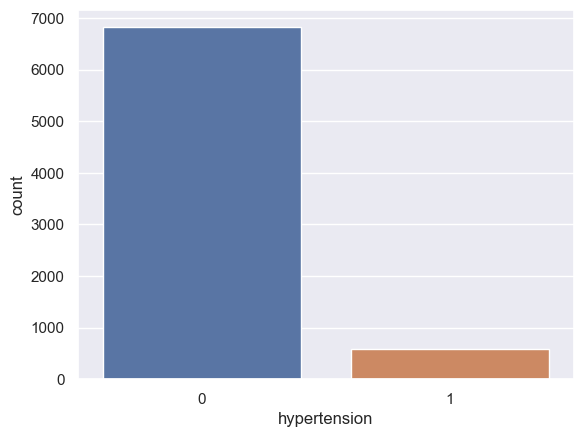

In [13]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

*From above, it shows that less people are suffering from hypertension.*

### **Marriage Status** <a id="3.2.3"></a>

ever_married
Yes    5046
No     2365
Name: count, dtype: int64


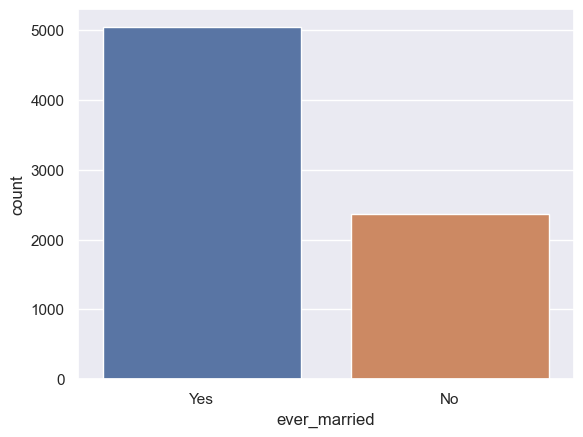

In [14]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

*The ratio can seen from above is around 2:1 for being ever married.*

### **Work Type** <a id="3.2.4"></a>

work_type
Private          4420
Self-employed    1066
Govt_job          969
children          687
Never_worked      269
Name: count, dtype: int64


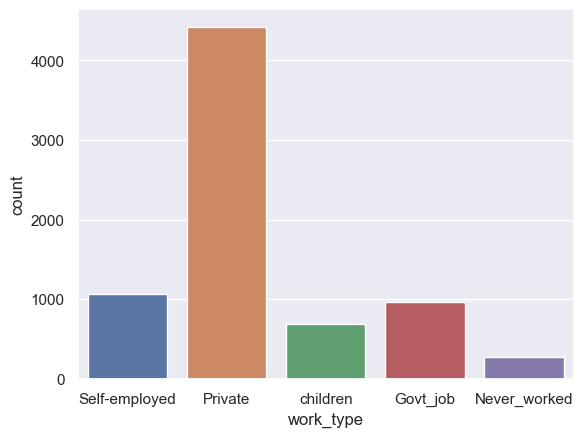

In [15]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

*A lot of people works in Private sector.*

### **Residence Type** <a id="3.2.5"></a>

Residence_type
Rural    3965
Urban    3446
Name: count, dtype: int64


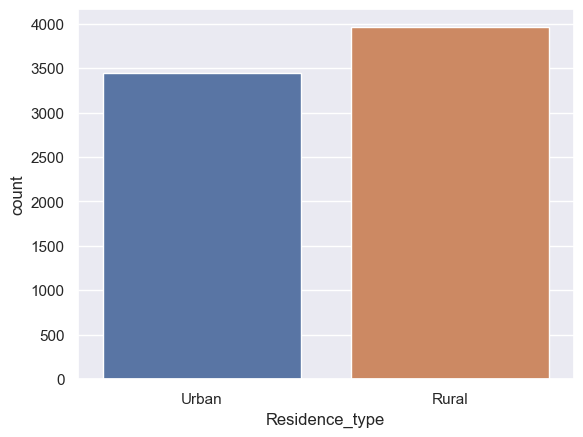

In [16]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

*The residence type is same for people present in our dataset.*

### **Smoking Status** <a id="3.2.6"></a>

smoking_status
never smoked       2475
Unknown            2201
formerly smoked    1882
smokes              853
Name: count, dtype: int64


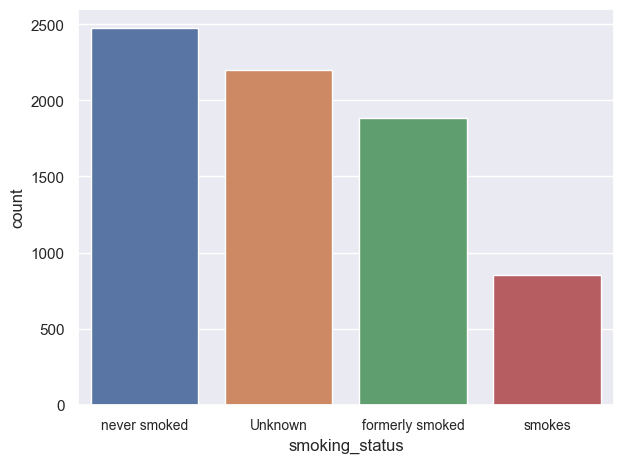

In [17]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

*A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.*

### **Stroke** <a id="3.2.7"></a>

stroke
0    4861
1    2550
Name: count, dtype: int64


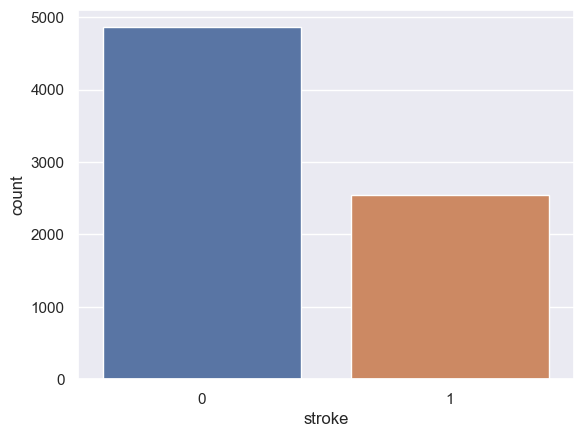

In [18]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

*From above dependent variable, we have really less peoples who suffered stroke. But, this also means that our dataset is imbalance. We likely have to use sampling techniques to make the data balance.*

*But, first let's plot more to see how our data does in this state.*

## **Distribution Plot** <a id="3.3"></a>

### **Avg. Glucose Level** <a id="3.3.1"></a>

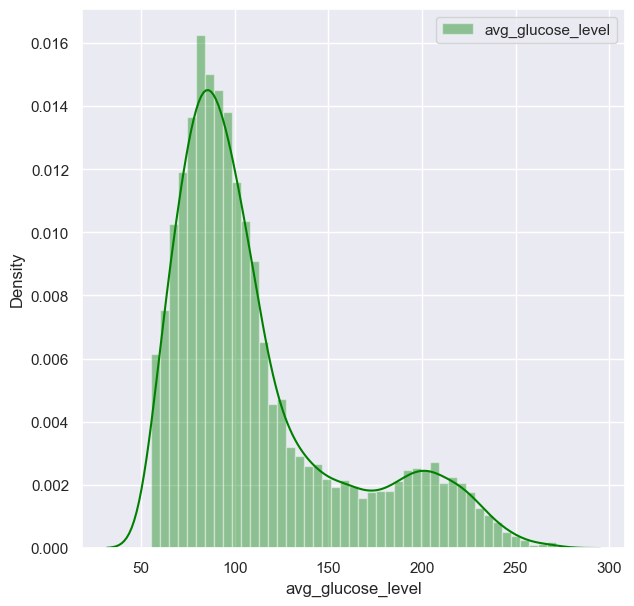

In [19]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

*1. The normal glucose levels in adults should be around 80-140. Therefore, the density is higher around that range. So, we can see that the we have lot of people who have normal glucose level, so they are not suffering from diabetes.*

*2. The range 140-200 can considered as pre-diabetes. But, looking at graph we can see that less people are in pre-diabetes zone.*

*3. Anything above 200 can be seen that the person is suffering from diabetes. The density is more as compare to pre-diabetes by looking at the graph.*

### **BMI** <a id="3.3.2"></a>

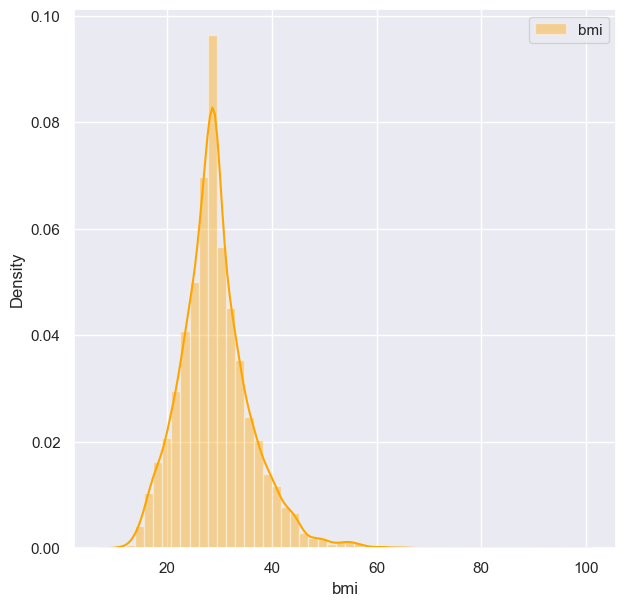

In [20]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

*1. BMI below 19 can be seen as under weight. By looking at our graph, not lot of people are underweight.*

*2. BMI between 19-25 can be seen as normal weight. We have relatively good amount of people who have normal weight.*

*3. BMI higher than 25 can be seen as the person is likely overweight or obese. Our graph shows the density is higher around those BMI.*

### **No Stroke vs Stroke by BMI** <a id="3.3.3"></a>

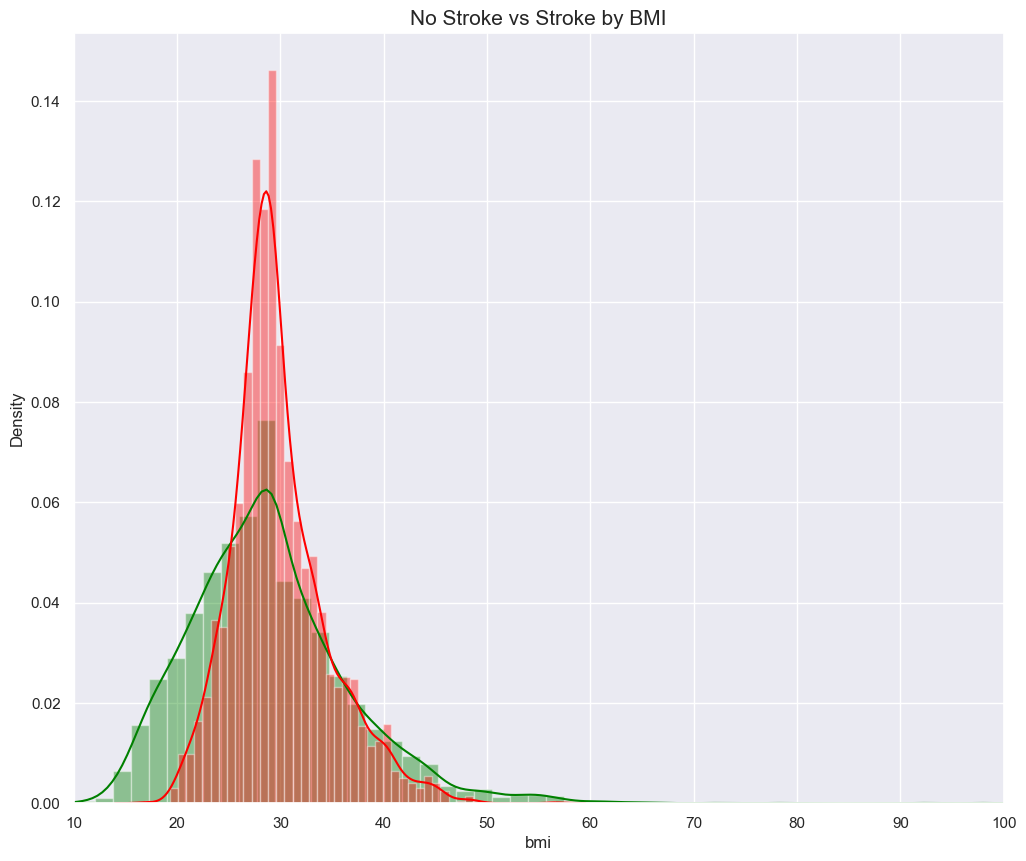

In [21]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

*From the graph, it shows that the density of overweight people who suffered a stroke is more.*

### **No Stroke vs Stroke by Avg. Glucose Level** <a id="3.3.4"></a>

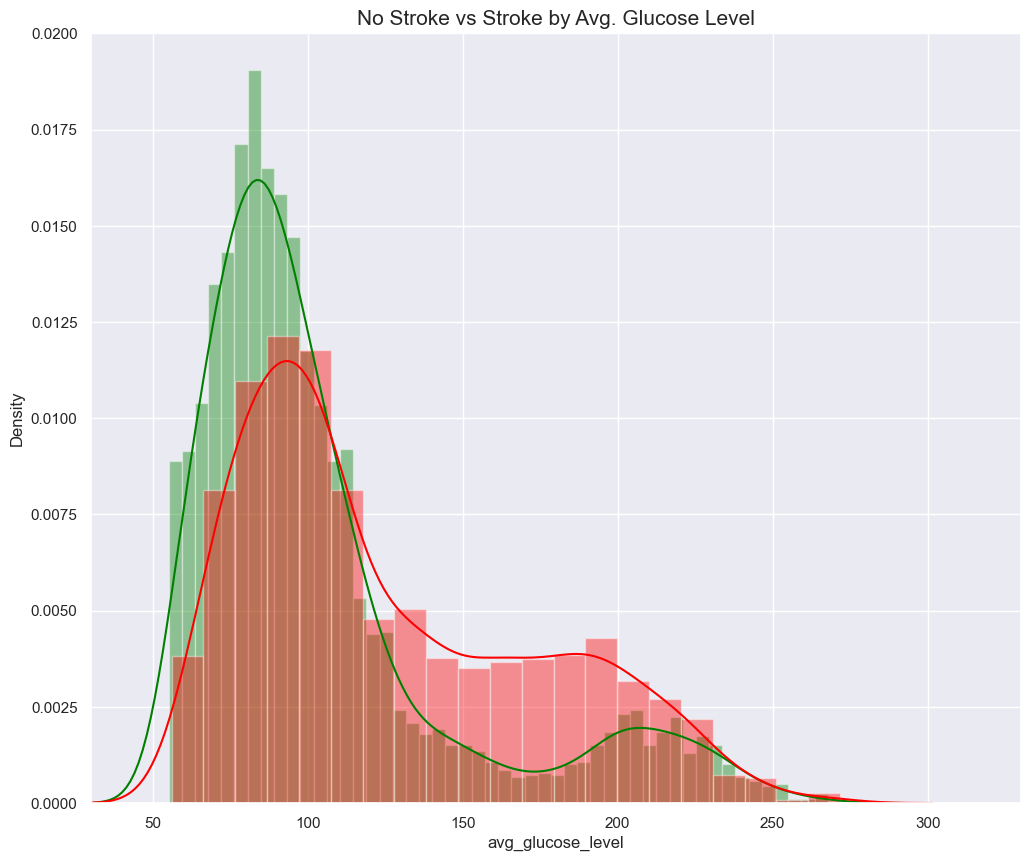

In [22]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

*From graph, it shows that the density of people having glucose level less than 100 suffered stroke more.*

### **No Stroke vs Stroke by Age** <a id="3.3.5"></a>

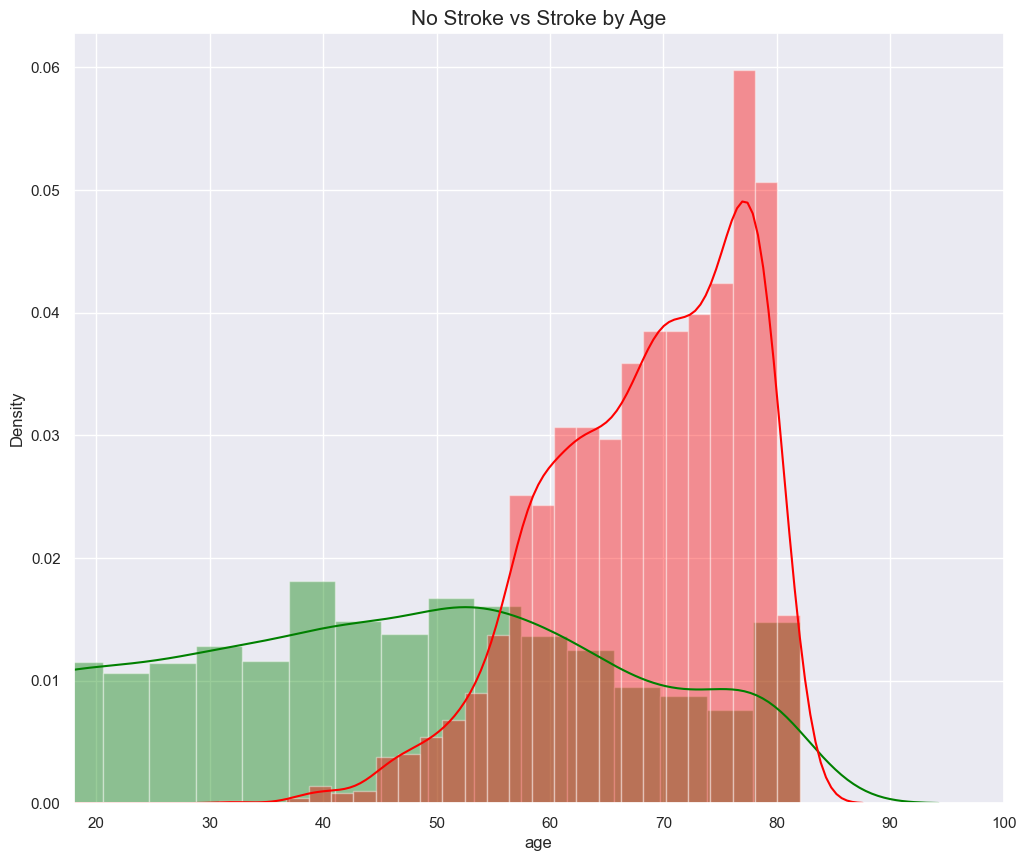

In [23]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

*From graph, it can be seen that the density of people having age above 50 suffered stroke more.*

## **Scatter Plot** <a id="3.4"></a>

### **Age vs BMI** <a id="3.4.1"></a>

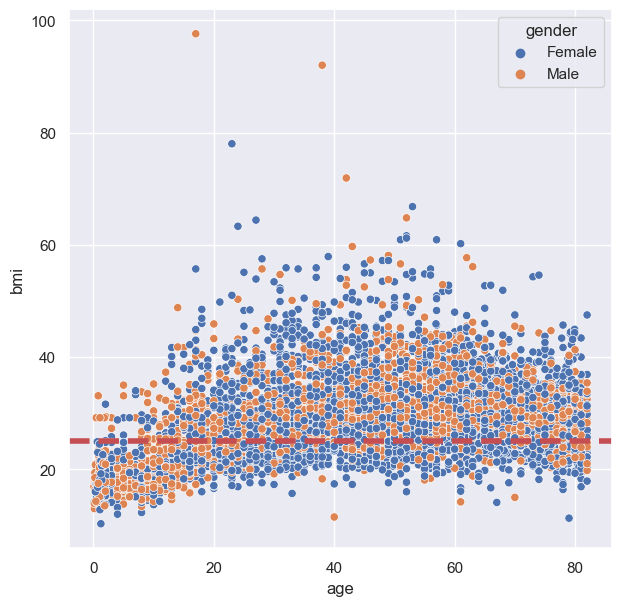

In [24]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that there are lot of people having BMI above 25 are overweight and obese.*

### **Age vs Avg. Glucose Level** <a id="3.4.2"></a>

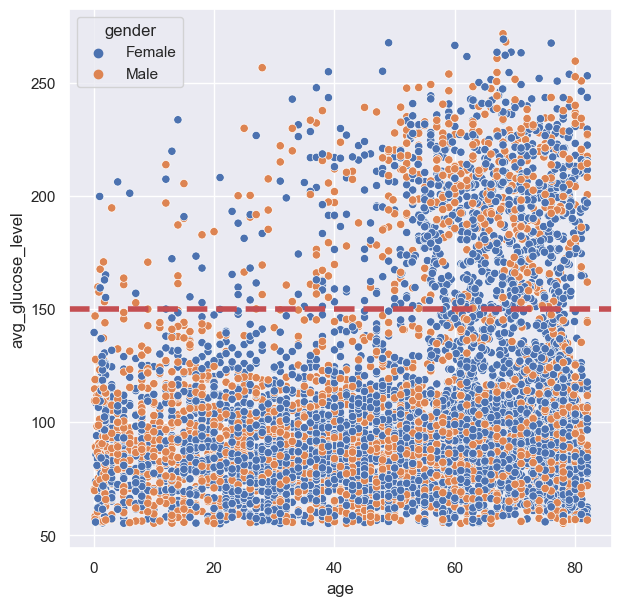

In [25]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

*From above plot, we can see that people having glucose level above 150 are relatively less as compare one below. So, we can say that people above 150 might be suffering from diabetes.*

## **Violin Plot** <a id="3.5"></a>

In [26]:
# plt.figure(figsize=(13,13))
# sns.set_theme(style="darkgrid")
# plt.subplot(2,3,1)
# sns.violinplot(x = 'gender', y = 'stroke', data = dataset)
# plt.subplot(2,3,2)
# sns.violinplot(x = 'hypertension', y = 'stroke', data = dataset)
# plt.subplot(2,3,3)
# sns.violinplot(x = 'heart_disease', y = 'stroke', data = dataset)
# plt.subplot(2,3,4)
# sns.violinplot(x = 'ever_married', y = 'stroke', data = dataset)
# plt.subplot(2,3,5)
# sns.violinplot(x = 'work_type', y = 'stroke', data = dataset)
# plt.xticks(fontsize=9, rotation=45)
# plt.subplot(2,3,6)
# sns.violinplot(x = 'Residence_type', y = 'stroke', data = dataset)
# plt.show()

## **Pair Plot** <a id="3.6"></a>

<Figure size 1000x1000 with 0 Axes>

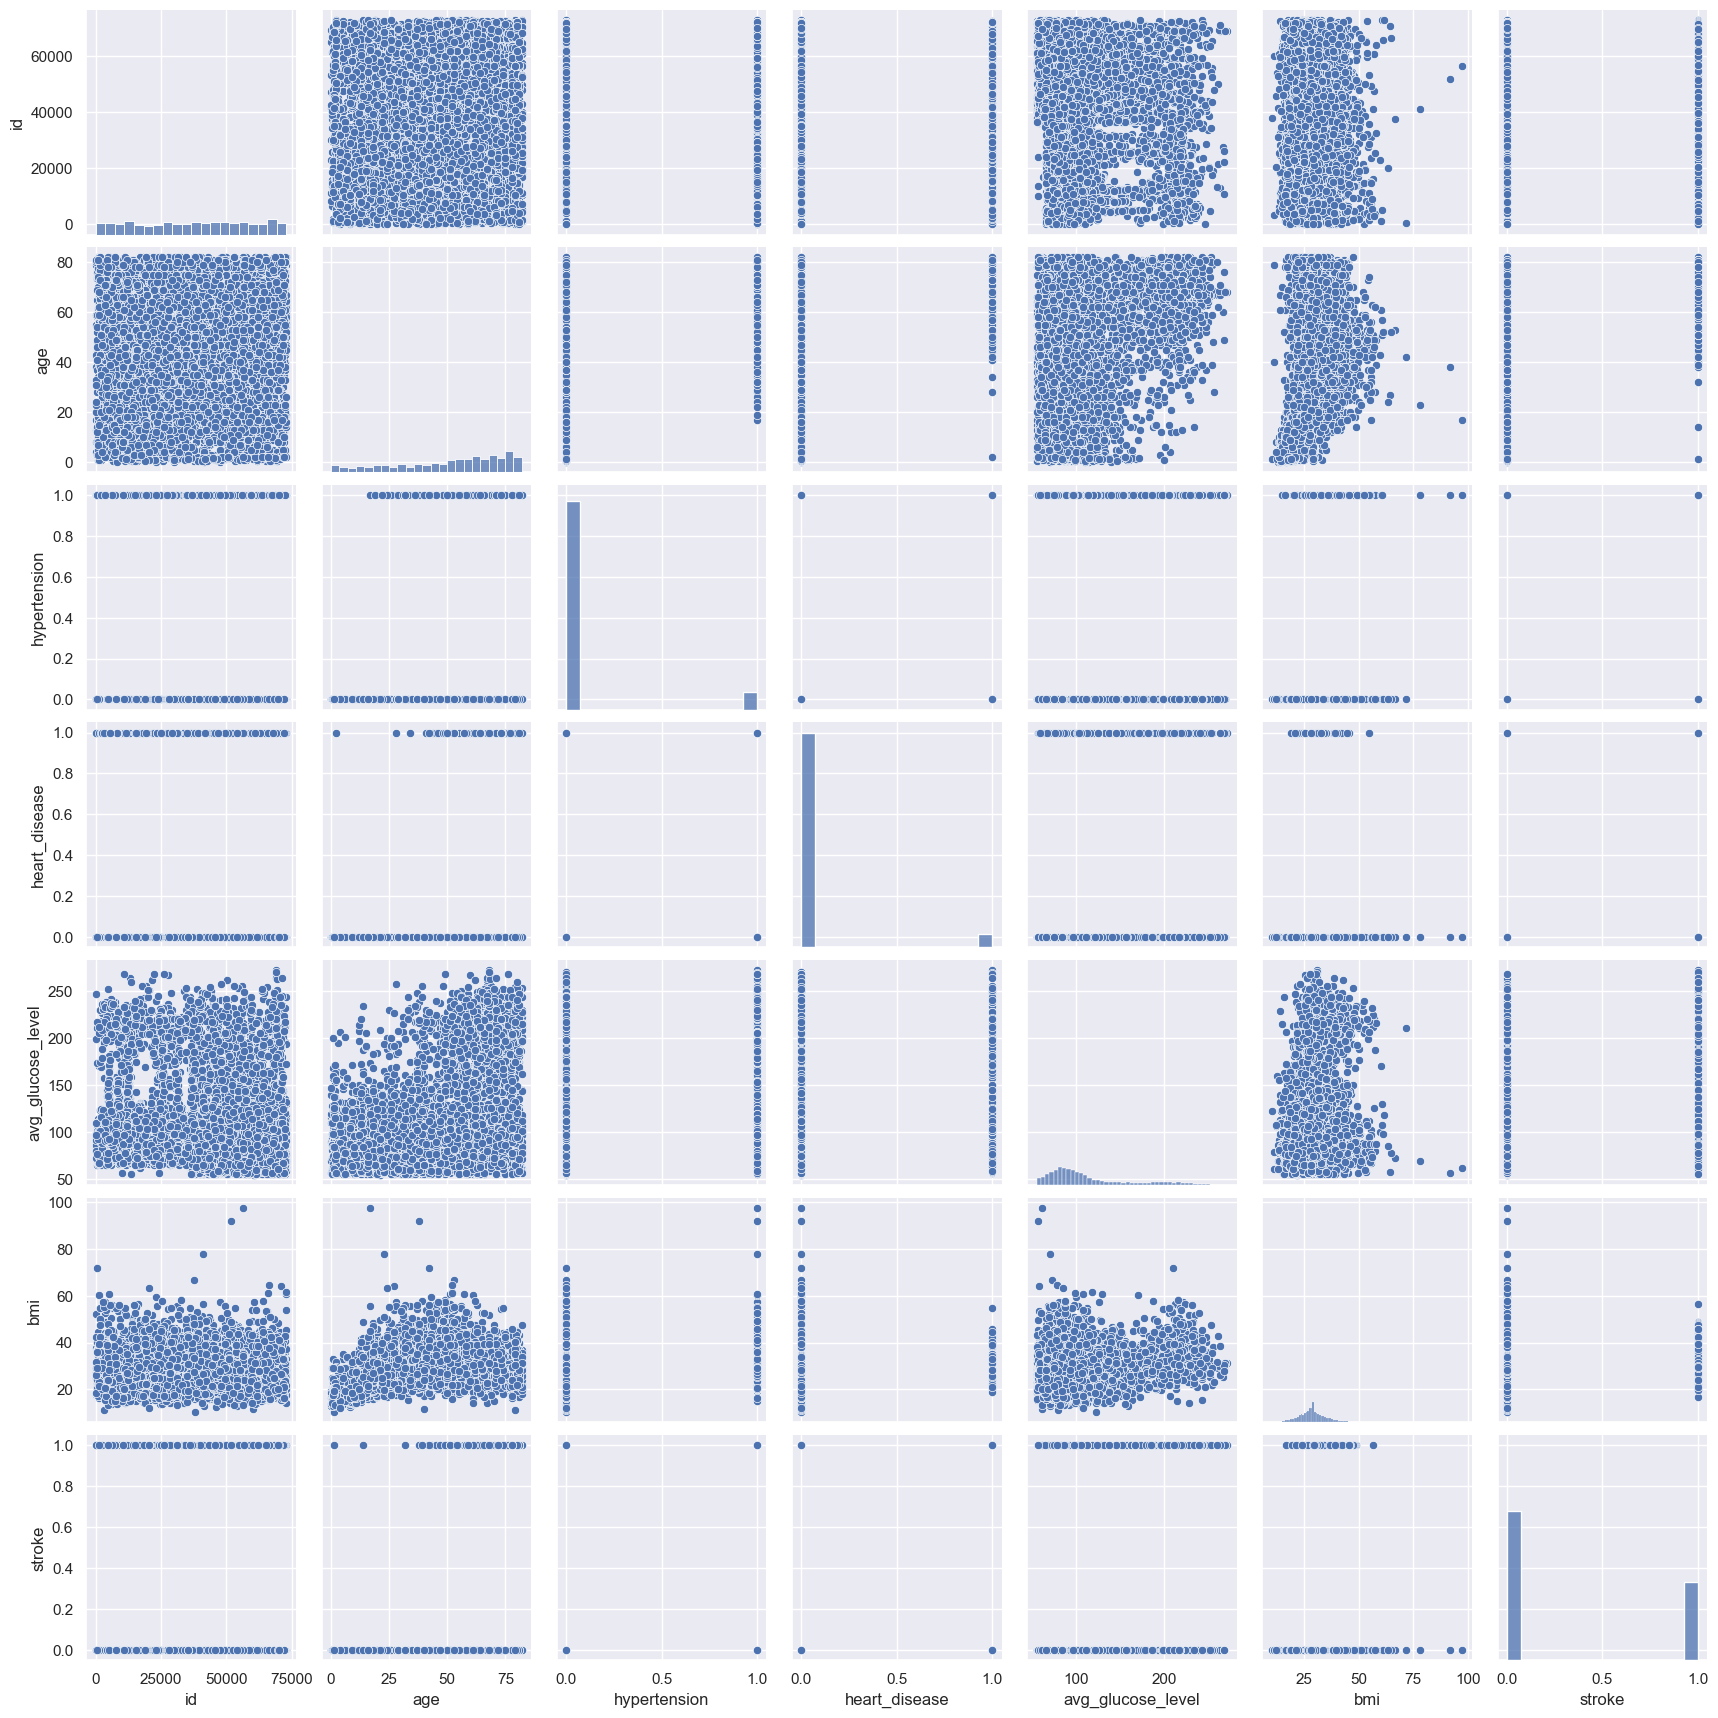

In [27]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset)
plt.show()

# **Data Preprocessing** <a id="4"></a>

**Encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# CASE 0: Binary encoder
dataset['gender']=dataset['gender'].apply(lambda x : 1 if x=='Male' else 0) 
dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# CASE 1: Use OneHotEncoder() to encode the categorical columns:
# data_dummies = dataset[['smoking_status','work_type']]
# data_dummies=pd.get_dummies(data_dummies)
# dataset.drop(columns=['smoking_status','work_type'],inplace=True)
# CASE 2: Use LabelEncoder() to encode the categorical columns:
label_encoder = LabelEncoder()
dataset['smoking_status'] = label_encoder.fit_transform(dataset['smoking_status'])
dataset['work_type'] = label_encoder.fit_transform(dataset['work_type'])

In [29]:
# dataset['gender'] = dataset['gender'].map({'Male':0, 'Female':1})
# dataset['Residence_type'] = dataset['Residence_type'].map({'Urban':0, 'Rural':1})
# dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
# dataset['ever_married'] = dataset['ever_married'].map({'Yes':0, 'No':1})
# dataset['work_type'] = dataset['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

**Train, validation, test set**

In [30]:
y=dataset['stroke']
dataset.drop(columns=['id','stroke'],inplace=True)
x=dataset.astype(int)

from sklearn.model_selection import train_test_split
x_train, x_tmp, y_train, y_tmp = train_test_split(x, y, train_size= 0.7, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size= 0.5, random_state = 1)

**Handle imblanced data**

In [31]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

#adasyn = ADASYN()
#x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train.ravel())

#borderline_smote = BorderlineSMOTE()
#x_train_res, y_train_res = borderline_smote.fit_resample(x_train, y_train.ravel())

**Add noise**

In [32]:
def add_noise(data, noise_level=0.02):
    noisy_data = data.copy()
    for column in ['bmi', 'age', 'glucose']:
        if column in noisy_data.columns:
            noise = np.random.normal(0, noise_level, size=noisy_data[column].shape)
            noisy_data[column] += noise
    return noisy_data

In [33]:
x_train_res = add_noise(x_train_res)

**Normailzation**

In [34]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

# Model Selection <a id="9"></a>

In [35]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [38]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[599 134]
 [ 71 308]]
Accuracy Score:  0.8156474820143885

K-Fold Validation Mean Accuracy: 84.86 %

Standard Deviation: 2.41 %

ROC AUC Score: 0.81

Precision: 0.70

Recall: 0.81

F1: 0.75
-----------------------------------

SVM :
[[645  88]
 [ 49 330]]
Accuracy Score:  0.8767985611510791

K-Fold Validation Mean Accuracy: 89.11 %

Standard Deviation: 2.36 %

ROC AUC Score: 0.88

Precision: 0.79

Recall: 0.87

F1: 0.83
-----------------------------------

KNeighbors :
[[620 113]
 [ 36 343]]
Accuracy Score:  0.8660071942446043

K-Fold Validation Mean Accuracy: 89.29 %

Standard Deviation: 1.93 %

ROC AUC Score: 0.88

Precision: 0.75

Recall: 0.91

F1: 0.82
-----------------------------------

GaussianNB :
[[587 146]
 [ 54 325]]
Accuracy Score:  0.8201438848920863

K-Fold Validation Mean Accuracy: 84.45 %

Standard Deviation: 2.65 %

ROC AUC Score: 0.83

Precision: 0.69

Recall: 0.86

F1: 0.76
-----------------------------------

BernoulliNB :
[[583 150]
 [ 78 301

In [39]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [40]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [55]:
df.iloc[0]

Model                   Random Forest
Accuracy                    91.097122
K-Fold Mean Accuracy        92.784767
Std. Deviation               2.134718
ROC AUC                      0.909533
Precision                    0.844828
Recall                       0.905013
F1                           0.873885
Name: 6, dtype: object

In [56]:
df.iloc[1]

Model                     XGBoost
Accuracy                90.467626
K-Fold Mean Accuracy    92.167682
Std. Deviation           2.336931
ROC AUC                  0.903483
Precision                0.833741
Recall                   0.899736
F1                       0.865482
Name: 7, dtype: object

In [57]:
df.iloc[2]

Model                         SVM
Accuracy                87.679856
K-Fold Mean Accuracy    89.110694
Std. Deviation           2.362297
ROC AUC                  0.875329
Precision                0.789474
Recall                   0.870712
F1                       0.828105
Name: 1, dtype: object

In [ ]:
df.iloc[3]

In [58]:
df.iloc[4]

Model                   Decision Tree
Accuracy                    85.881295
K-Fold Mean Accuracy        88.390516
Std. Deviation               2.375225
ROC AUC                      0.856589
Precision                    0.763033
Recall                       0.849604
F1                           0.803995
Name: 5, dtype: object

In [59]:
df.iloc[5]

Model                   GaussianNB
Accuracy                 82.014388
K-Fold Mean Accuracy     84.451585
Std. Deviation            2.652284
ROC AUC                   0.829169
Precision                 0.690021
Recall                     0.85752
F1                        0.764706
Name: 3, dtype: object

In [60]:
df.iloc[6]

Model                   Logistic Regreesion
Accuracy                          81.564748
K-Fold Mean Accuracy              84.863047
Std. Deviation                     2.414465
ROC AUC                            0.814927
Precision                          0.696833
Recall                             0.812665
F1                                 0.750305
Name: 0, dtype: object

In [61]:
df.iloc[7]

Model                   BernoulliNB
Accuracy                  79.496403
K-Fold Mean Accuracy      82.599767
Std. Deviation             2.537044
ROC AUC                    0.794778
Precision                  0.667406
Recall                     0.794195
F1                         0.725301
Name: 4, dtype: object

# Tuning the Models <a id="10"></a>

In [42]:
from sklearn.model_selection import GridSearchCV

*The **GridSearchCV** is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.*

In [43]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [44]:
grid_models = [
    (LogisticRegression(), 
     [{'C': [0.25, 0.5, 0.75, 1], 'random_state': [0]}]), 
    (KNeighborsClassifier(), 
     [{'n_neighbors': [5, 7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
    (SVC(), 
     [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf'], 'random_state': [0]}]), 
    (GaussianNB(), 
     [{'var_smoothing': [1e-09, 1e-08, 1e-07]}]), 
    (BernoulliNB(), 
     [{'alpha': [0.25, 0.5, 1], 'binarize': [0.0, 0.5, 1.0]}]), 
    (DecisionTreeClassifier(), 
     [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'random_state': [0]}]), 
    (RandomForestClassifier(), 
     [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'random_state': [0]}]), 
    (XGBClassifier(), 
     [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error'], 'max_depth': [3, 5, 7]}])
]

In [45]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'f1',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 85.19%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 89.94%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 89.20%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 85.04%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

BernoulliNB():
Best Accuracy : 83.02%
Best Parameters :  {'alpha': 0.25, 'binarize': 0.0}

----------------

DecisionTreeClassifier():
Best Accuracy : 88.74%
Best Parameters :  {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 92.90%
Best Parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=Non

*Looking at output after **GridSearch**, we can determine that the **RandomForest** and **XGBoost** seems best fit for the model.*

# Models after Tuning Hyperparameters <a id="11"></a>

*We only see **RandomForest** and **XGBoost** performance as they have high accuracy.*

## RandomForest <a id="11.1"></a>

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       733
           1       0.71      0.88      0.79       379

    accuracy                           0.84      1112
   macro avg       0.82      0.85      0.83      1112
weighted avg       0.85      0.84      0.84      1112

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       726
           1       0.71      0.91      0.80       386

    accuracy                           0.84      1112
   macro avg       0.83      0.86      0.83      1112
weighted avg       0.86      0.84      0.84      1112

ROC AUC score: 0.9243053630758044
Accuracy Score:  0.8381294964028777


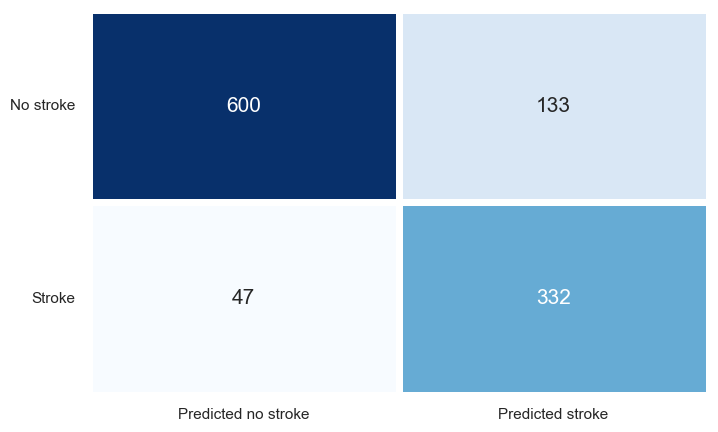

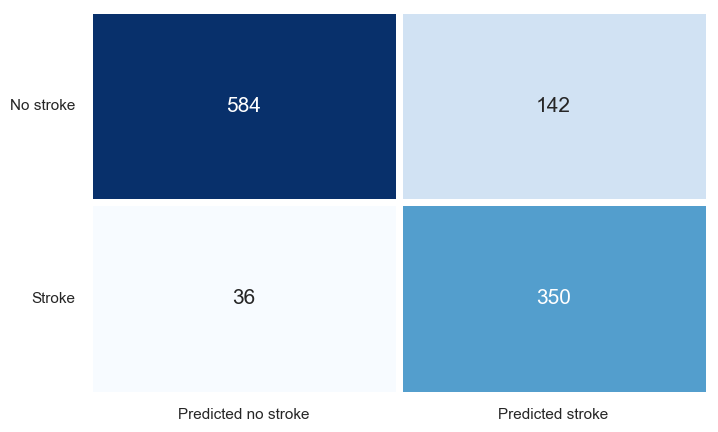

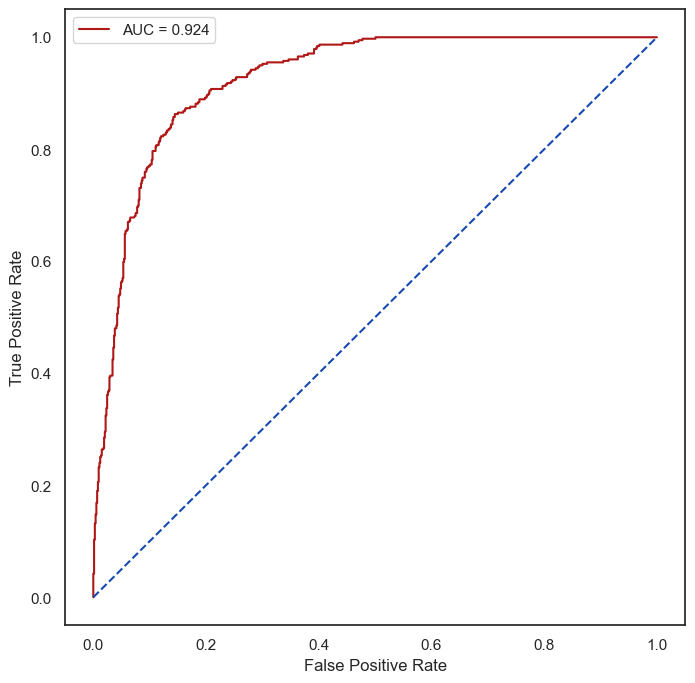

In [51]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 500, random_state= 0,max_depth=5)
classifier.fit(x_train_res, y_train_res)
#y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))



y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
plt.figure(figsize = (8, 5))
sns.heatmap(cm2, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [47]:
thresholds = [ 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred = np.where(y_prob >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    print()

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       733
           1       0.59      0.96      0.73       379

    accuracy                           0.76      1112
   macro avg       0.78      0.81      0.76      1112
weighted avg       0.84      0.76      0.76      1112


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       733
           1       0.64      0.94      0.76       379

    accuracy                           0.80      1112
   macro avg       0.80      0.83      0.79      1112
weighted avg       0.85      0.80      0.80      1112


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       733
           1       0.71      0.88      0.79       379

    accuracy                           0.84      1112
   macro avg       0.82      0.85      0.83      1112
weighted avg       0.85    

In [48]:
# # Lấy các chỉ số của các trường hợp FP và FN
# false_positives = x_test_debug[(y_test == 0) & (y_pred == 1)]
# false_negatives = x_test_debug[(y_test == 1) & (y_pred == 0)]

# # Xem thông tin của các trường hợp FP và FN
# print("False Positives:\n", false_positives)
# print("False Negatives:\n", false_negatives)

## XGBoost <a id="11.2"></a>

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       733
           1       0.67      0.89      0.76       379

    accuracy                           0.81      1112
   macro avg       0.80      0.83      0.80      1112
weighted avg       0.84      0.81      0.82      1112

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       726
           1       0.68      0.90      0.78       386

    accuracy                           0.82      1112
   macro avg       0.81      0.84      0.81      1112
weighted avg       0.85      0.82      0.82      1112

ROC AUC score: 0.916931538802118
Accuracy Score:  0.8120503597122302


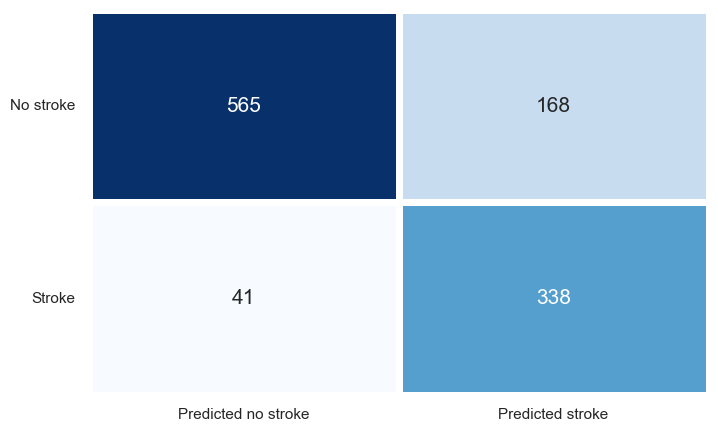

Text(0.5, 0, 'False Positive Rate')

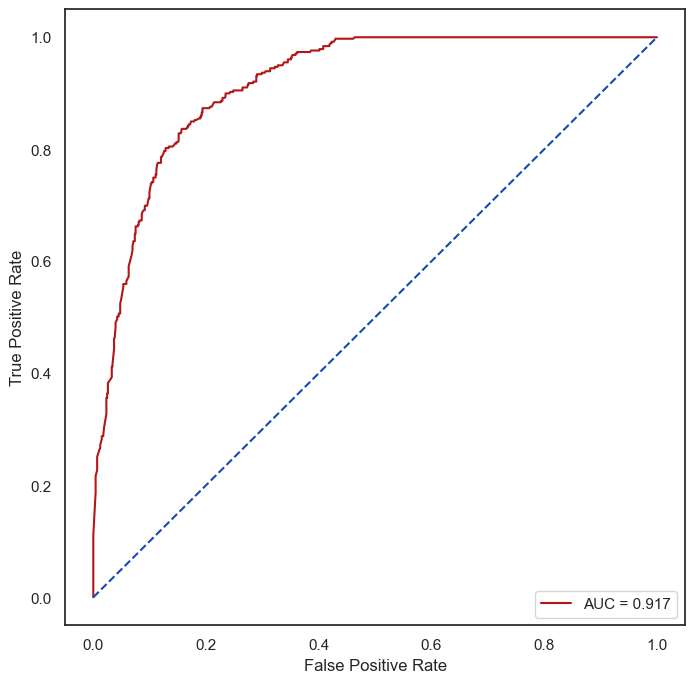

In [52]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1,max_depth=1)
classifier.fit(x_train_res, y_train_res)
# y_pred = classifier.predict(x_test)
# y_prob = classifier.predict_proba(x_test)[:,1]
# cm = confusion_matrix(y_test, y_pred)
y_prob = classifier.predict_proba(x_test)[:,1]
threshold = 0.5
y_pred = np.where(y_prob >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


y_prob2 = classifier.predict_proba(x_val)[:,1]
threshold = 0.5
y_pred2 = np.where(y_prob2 >= threshold, 1, 0)
cm2 = confusion_matrix(y_val, y_pred2)
print(classification_report(y_val, y_pred2))



print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [50]:
# Lấy các chỉ số của các trường hợp FP và FN
false_positives = x_test_debug[(y_test == 0) & (y_pred == 1)]
false_negatives = x_test_debug[(y_test == 1) & (y_pred == 0)]

# Xem thông tin của các trường hợp FP và FN
print("False Positives:\n", false_positives)
print("False Negatives:\n", false_negatives)


NameError: name 'x_test_debug' is not defined

In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for threshold in thresholds:
    y_pred = np.where(y_prob >= threshold, 1, 0)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))
    print()

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.99      0.49      0.66       968
           1       0.09      0.93      0.17        54

    accuracy                           0.51      1022
   macro avg       0.54      0.71      0.41      1022
weighted avg       0.94      0.51      0.63      1022


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.98      0.59      0.74       968
           1       0.10      0.83      0.18        54

    accuracy                           0.60      1022
   macro avg       0.54      0.71      0.46      1022
weighted avg       0.94      0.60      0.71      1022


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       968
           1       0.12      0.76      0.20        54

    accuracy                           0.68      1022
   macro avg       0.55      0.72      0.50      1022
weighted avg       0.93    

In [ ]:
error_df = x_test.copy()
error_df['true_label'] = y_test
error_df['predicted_label'] = y_pred
error_df['error'] = error_df['true_label'] != error_df['predicted_label']

sns.pairplot(error_df, hue='error', palette={False: "blue", True: "red"})
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
x_test = pd.DataFrame(x_test, columns=['age', 'bmi', '...'])  # Thêm tên các cột tương ứng

# Chuyển y_test và y_pred thành Series của pandas
y_test = pd.Series(y_test, name='true_label')
y_pred = pd.Series(y_pred, name='predicted_label')

# Thêm cột lỗi vào DataFrame
x_test['true_label'] = y_test.values
x_test['predicted_label'] = y_pred.values
x_test['error'] = x_test['true_label'] != x_test['predicted_label']

# Vẽ biểu đồ phân phối đặc điểm 'bmi'
sns.histplot(data=x_test, x='bmi', hue='error', multiple='dodge')
plt.title("Distribution of 'bmi' for Correct and Incorrect Predictions")
plt.show()

ValueError: Shape of passed values is (1022, 21), indices imply (1022, 3)